### **1. Importing Library**

In [1]:
# Install CatBoost
!pip install catboost



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### **2. Data Prep**

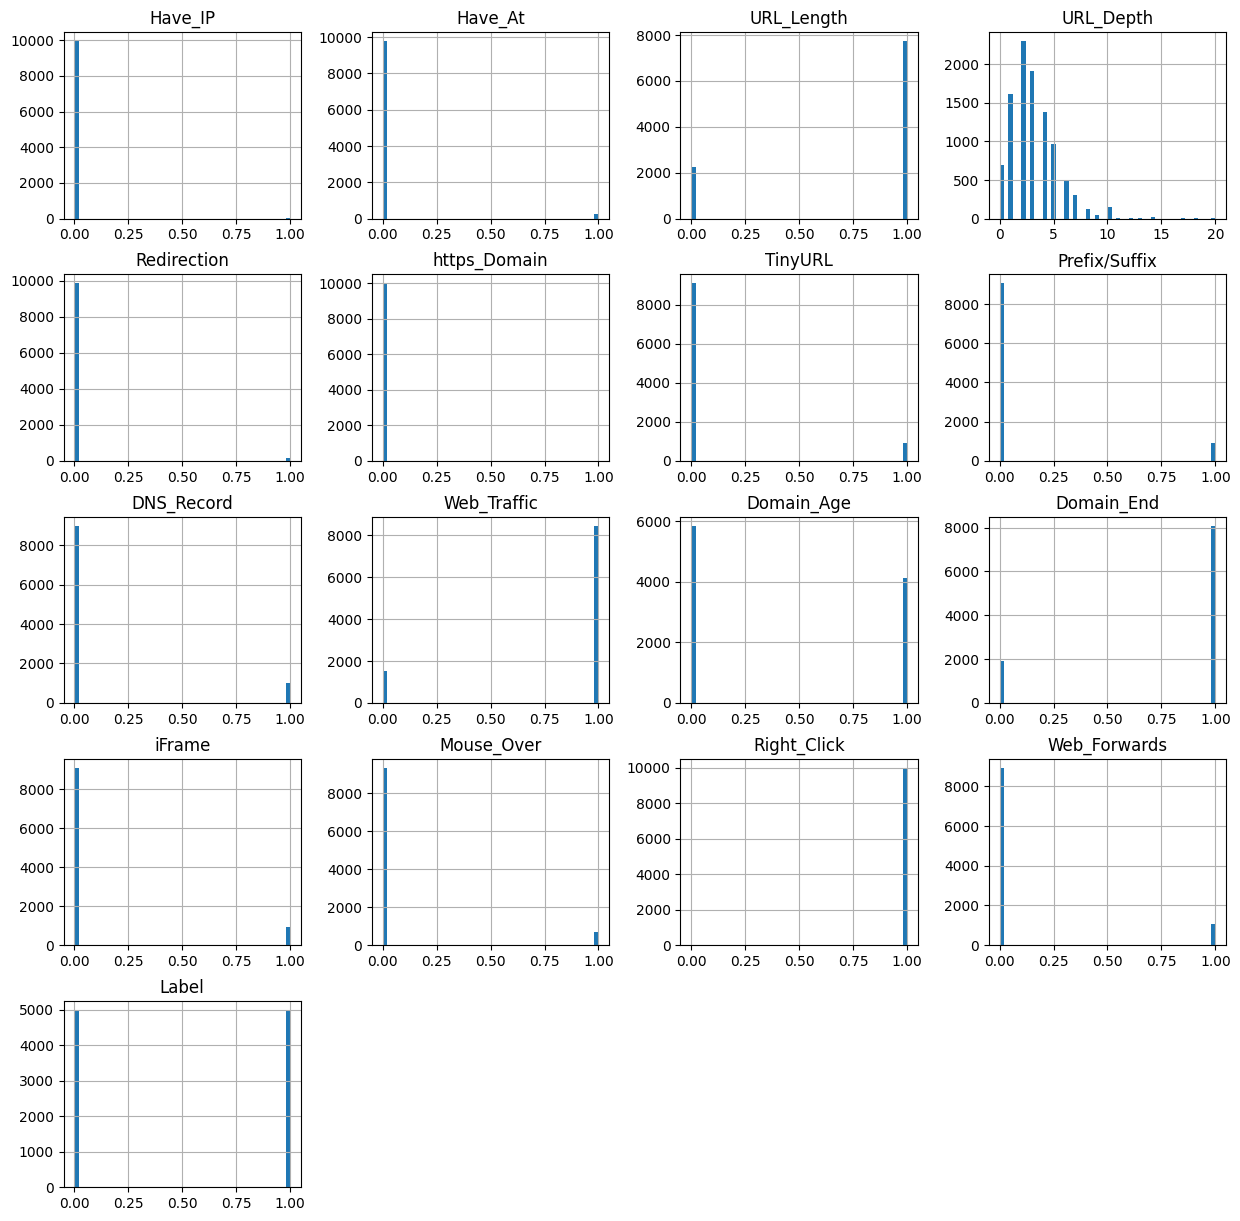

In [3]:
#Loading the data
df = pd.read_csv('5.urldata.csv')

#Plotting the data distribution
df.hist(bins = 50,figsize = (15,15))
plt.show()

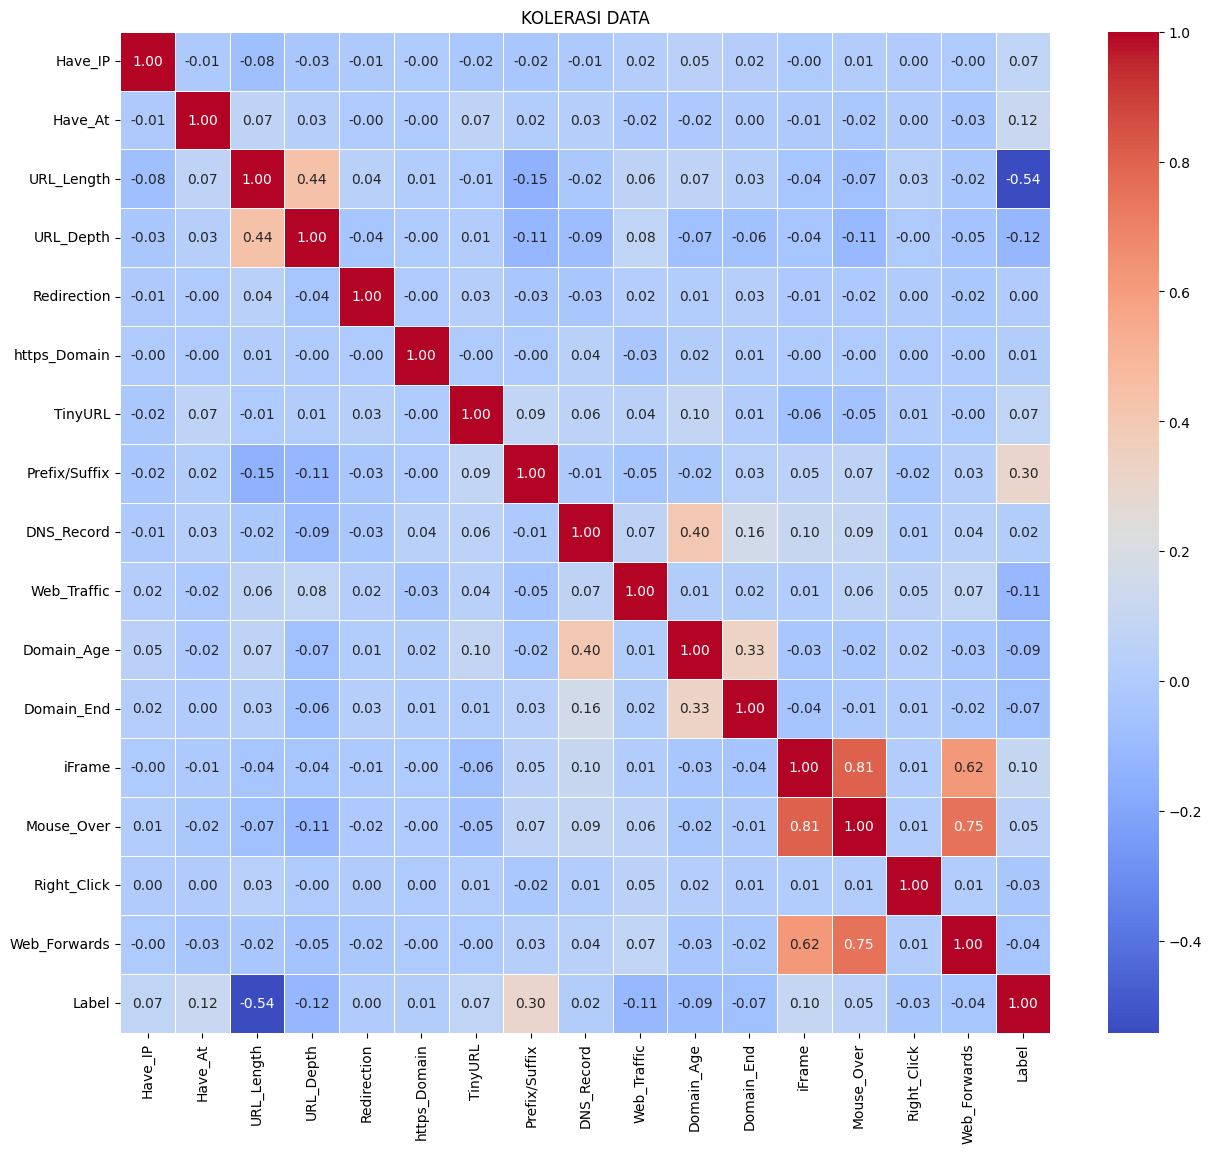

In [4]:
numeric_data = df.select_dtypes(include=[np.number])

# Menghitung korelasi
corr_matrix = numeric_data.corr()

# Membuat heatmap dengan anotasi nilai korelasi
plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("KOLERASI DATA")
plt.show()

In [5]:
# Memisahkan fitur dan label
X = df.drop(columns=['Domain', 'Label'])
y = df['Label']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **3. Train CatBoost**

In [6]:
# Membuat dan melatih model CatBoost
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=100)
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)


0:	learn: 0.5971984	test: 0.6013634	best: 0.6013634 (0)	total: 56.4ms	remaining: 56.3s
100:	learn: 0.3193562	test: 0.3383706	best: 0.3383706 (100)	total: 1.51s	remaining: 13.5s
200:	learn: 0.3068179	test: 0.3287878	best: 0.3287878 (200)	total: 2.79s	remaining: 11.1s
300:	learn: 0.3022808	test: 0.3267421	best: 0.3266841 (291)	total: 4.46s	remaining: 10.4s
400:	learn: 0.3008865	test: 0.3263147	best: 0.3263147 (400)	total: 6.11s	remaining: 9.12s
500:	learn: 0.2992944	test: 0.3260593	best: 0.3260414 (490)	total: 7.8s	remaining: 7.77s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3258829773
bestIteration = 516

Shrink model to first 517 iterations.


### **4. Evaluasi Model**

In [7]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)

# Format akurasi dengan 3 digit koma
accuracy_formatted = f"{accuracy:.3f}"

# Mendapatkan akurasi train
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Format akurasi train dengan 3 digit koma
accuracy_train_formatted = f"{accuracy_train:.3f}"

print('Accuracy Train:', accuracy_train_formatted)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Accuracy Test:', accuracy_formatted)



Accuracy Train: 0.867
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1012
           1       0.95      0.75      0.84       988

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

Accuracy Test: 0.858


### **CONFUSSION** MATRIX

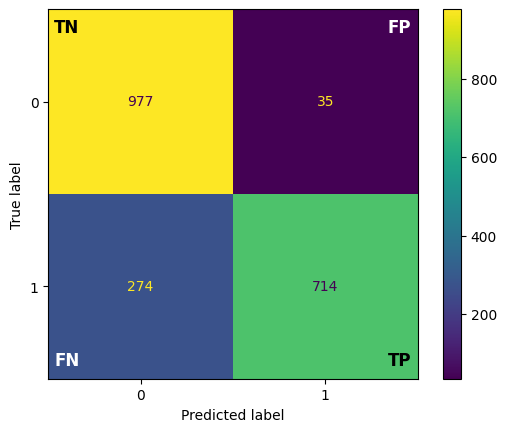

In [19]:
# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Step 2: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# Step 3: Add labels (TP, TN, FP, FN)
# Get the current plot and annotate the confusion matrix
ax = plt.gca()
ax.text(-0.4, 1.4, 'FN', va='center', ha='center', color='white', fontsize=12, weight='bold')
ax.text(1.4, -0.4, 'FP', va='center', ha='center', color='white', fontsize=12, weight='bold')
ax.text(1.4, 1.4, 'TP', va='center', ha='center', color='black', fontsize=12, weight='bold')
ax.text(-0.4, -0.4, 'TN', va='center', ha='center', color='black', fontsize=12, weight='bold')

# Show the plot
plt.show()

### **5. Feature Importance**

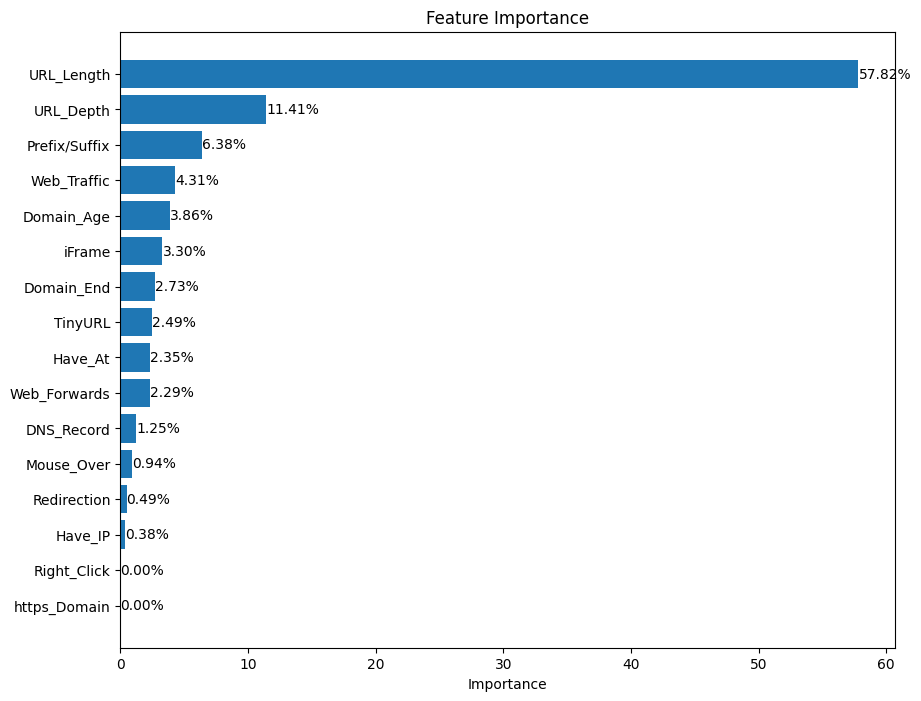

In [9]:
# Mendapatkan pentingnya fitur
feature_importances = model.get_feature_importance()
feature_names = X.columns

# Membuat DataFrame untuk menyimpan pentingnya fitur
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Mengurutkan berdasarkan pentingnya fitur
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Menghitung persentase pentingnya fitur
feature_importance_df['Importance (%)'] = (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100

# Membuat plot diagram batang horizontal
plt.figure(figsize=(10, 8))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')

# Menambahkan persentase di ujung batang
for bar, importance in zip(bars, feature_importance_df['Importance (%)']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}%', va='center', ha='left')

plt.show()


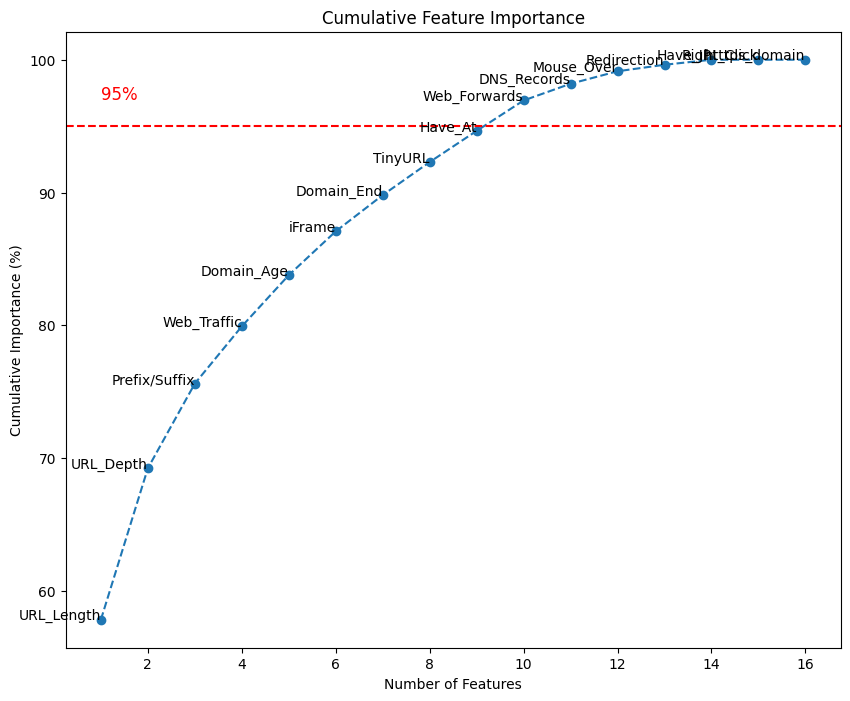

In [10]:
# Data importance dan fitur
importances = [57.82, 11.41, 6.38, 4.31, 3.86, 3.30, 2.73, 2.49, 2.35, 2.29, 1.26, 0.94, 0.49, 0.38, 0.00, 0.00]
features = ["URL_Length", "URL_Depth", "Prefix/Suffix", "Web_Traffic", "Domain_Age", "iFrame", "Domain_End",
            "TinyURL", "Have_At", "Web_Forwards", "DNS_Records", "Mouse_Over", "Redirection", "Have_IP",
            "Right_Click", "htttps_domain"]

# Menghitung cumulative importance
cumulative_importance = np.cumsum(importances)

# Membuat plot cumulative importance
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='--')

# Menambahkan label pada setiap titik
for i, txt in enumerate(features):
    plt.text(i + 1, cumulative_importance[i], txt, fontsize=10, ha='right')

# Menambahkan garis horizontal untuk threshold
threshold = 95
plt.axhline(y=threshold, color='r', linestyle='--')
plt.text(1, threshold + 2, f'{threshold}%', color='red', fontsize=12)

# Memberikan judul dan label
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance (%)')

plt.show()


### **6. Prunning Data with Cumulative Importance**

In [11]:
#Loading the data
dfNew = pd.read_csv('5.urldata.csv')

In [12]:
# Memisahkan fitur dan label
X = dfNew.drop(columns=['Domain', 'Label', 'Web_Forwards', 'DNS_Record', 'Mouse_Over', 'Redirection', 'Have_IP', 'Right_Click', 'https_Domain' ])
y = dfNew['Label']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Membuat dan melatih model CatBoost
model1 = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=100)
model1.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

0:	learn: 0.6010269	test: 0.6054324	best: 0.6054324 (0)	total: 4.85ms	remaining: 4.84s
100:	learn: 0.3367139	test: 0.3600256	best: 0.3600256 (100)	total: 802ms	remaining: 7.14s
200:	learn: 0.3289543	test: 0.3541503	best: 0.3541503 (200)	total: 1.83s	remaining: 7.27s
300:	learn: 0.3259675	test: 0.3524822	best: 0.3524822 (300)	total: 2.8s	remaining: 6.5s
400:	learn: 0.3248376	test: 0.3518414	best: 0.3518213 (396)	total: 4.12s	remaining: 6.15s
500:	learn: 0.3239292	test: 0.3511540	best: 0.3511540 (500)	total: 5.53s	remaining: 5.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3511024406
bestIteration = 505

Shrink model to first 506 iterations.


In [14]:
# Melakukan prediksi pada data uji
y_pred = model1.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)

# Format akurasi dengan 3 digit koma
accuracy_formatted = f"{accuracy:.3f}"

# Mendapatkan akurasi train
y_pred_train = model1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Format akurasi train dengan 3 digit koma
accuracy_train_formatted = f"{accuracy_train:.3f}"

print('Accuracy Train:', accuracy_train_formatted)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Accuracy Test:', accuracy_formatted)

Accuracy Train: 0.856
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86      1012
           1       0.95      0.72      0.82       988

    accuracy                           0.85      2000
   macro avg       0.87      0.84      0.84      2000
weighted avg       0.87      0.85      0.84      2000

Accuracy Test: 0.846


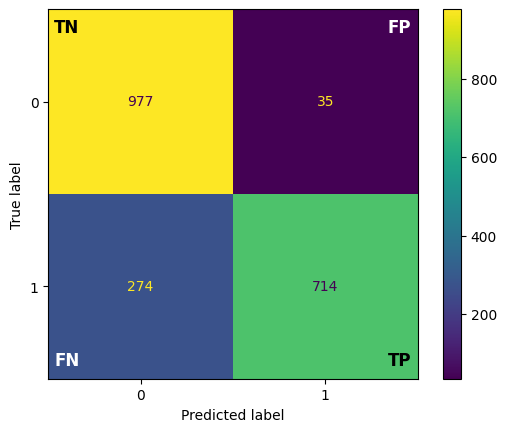

In [21]:
# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)

# Step 2: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()

# Step 3: Add labels (TP, TN, FP, FN)
# Get the current plot and annotate the confusion matrix
ax = plt.gca()
ax.text(-0.4, 1.4, 'FN', va='center', ha='center', color='white', fontsize=12, weight='bold')
ax.text(1.4, -0.4, 'FP', va='center', ha='center', color='white', fontsize=12, weight='bold')
ax.text(1.4, 1.4, 'TP', va='center', ha='center', color='black', fontsize=12, weight='bold')
ax.text(-0.4, -0.4, 'TN', va='center', ha='center', color='black', fontsize=12, weight='bold')

# Show the plot
plt.show()

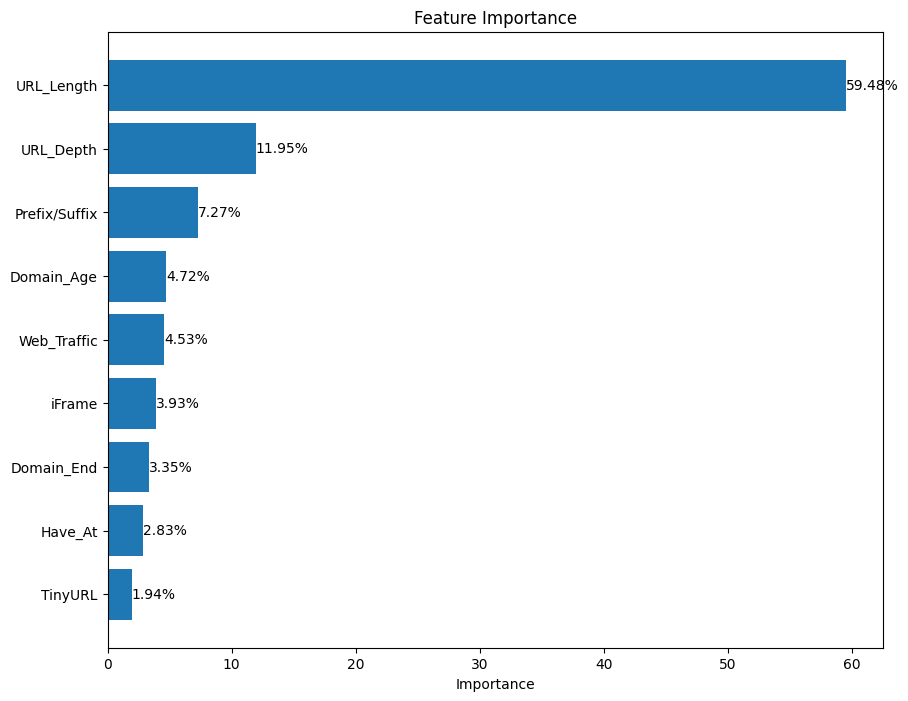

In [16]:
# Mendapatkan pentingnya fitur
feature_importances = model1.get_feature_importance()
feature_names = X.columns

# Membuat DataFrame untuk menyimpan pentingnya fitur
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Mengurutkan berdasarkan pentingnya fitur
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Menghitung persentase pentingnya fitur
feature_importance_df['Importance (%)'] = (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100

# Membuat plot diagram batang horizontal
plt.figure(figsize=(10, 8))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')

# Menambahkan persentase di ujung batang
for bar, importance in zip(bars, feature_importance_df['Importance (%)']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}%', va='center', ha='left')

plt.show()


In [17]:
!pip install joblib

In [18]:
# Simpan model ke file .joblib
import joblib
joblib.dump(model1, 'modelPrunn.joblib')

# 4. Mengunduh file model ke komputer lokal
from google.colab import files
files.download('modelPrunn.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>